In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("HR Analytics.csv")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.shape

(1470, 35)

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Here we can see that no missing data is present

In [7]:
# let's check the value counts of every columns.
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


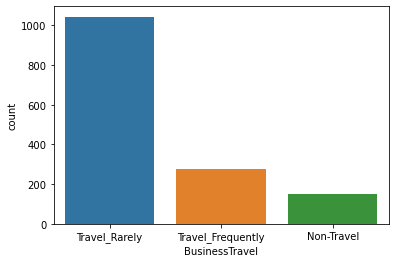

In [9]:
sns.countplot(x="BusinessTravel",data=df)
print(df["BusinessTravel"].value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


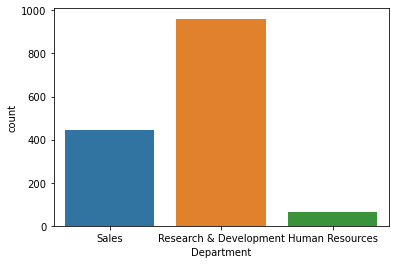

In [10]:
sns.countplot(x="Department",data=df)
print(df["Department"].value_counts())

Here we can see that most of the people working in the research and development field then sales and lowest amount of people working in the human resource field.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


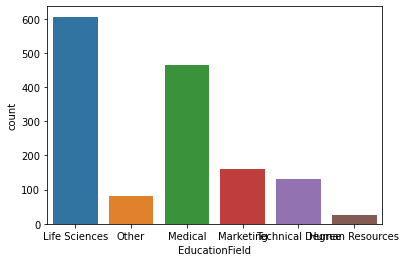

In [11]:
sns.countplot(x="EducationField",data=df)
print(df["EducationField"].value_counts())

Here we can see that most of the worker from life science , medical and then marketing background.

<AxesSubplot:ylabel='Frequency'>

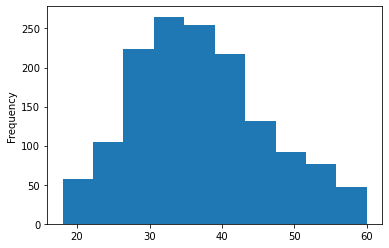

In [12]:
df["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

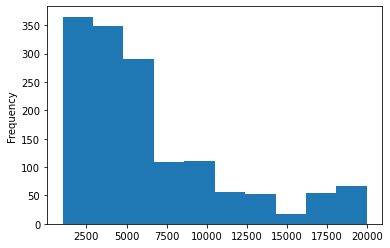

In [13]:
df["MonthlyIncome"].plot.hist()

Here we can see that most of the people belongs from the  2500 to 5000 income group.

<AxesSubplot:ylabel='Frequency'>

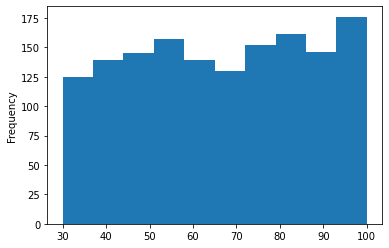

In [14]:
df["HourlyRate"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

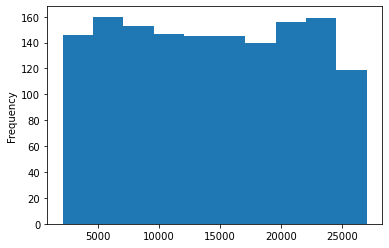

In [15]:
df["MonthlyRate"].plot.hist()

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


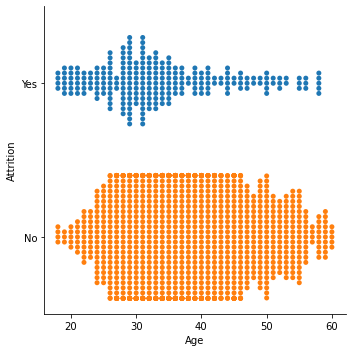

In [16]:
sns.catplot(data=df,kind="swarm",x="Age",y="Attrition")

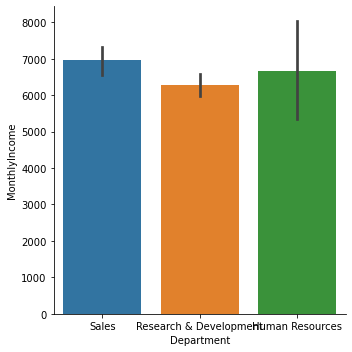

In [17]:
sns.catplot(data=df,x="Department",y="MonthlyIncome",kind="bar")

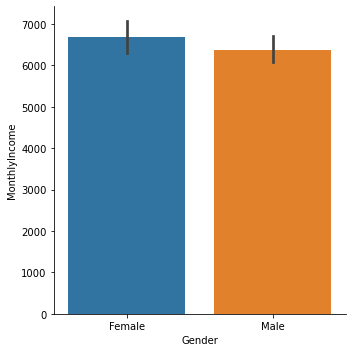

In [18]:
sns.catplot(data=df,x="Gender",y="MonthlyIncome",kind="bar")

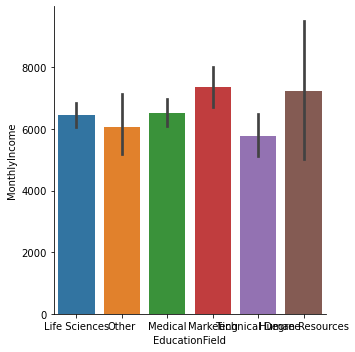

In [19]:
sns.catplot(data=df, x= "EducationField" , y ="MonthlyIncome" , kind= "bar")

In [20]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
lb=LabelEncoder()

In [23]:
df["Attrition"]=lb.fit_transform(df["Attrition"])

In [24]:
df["BusinessTravel"]=lb.fit_transform(df["BusinessTravel"])

In [25]:
df["Department"]=lb.fit_transform(df["Department"])

In [26]:
df["EducationField"]=lb.fit_transform(df["EducationField"])

In [27]:
df["Gender"]=lb.fit_transform(df["Gender"])

In [28]:
df["OverTime"]=lb.fit_transform(df["OverTime"])

In [29]:
df["JobRole"]=lb.fit_transform(df["JobRole"])

In [30]:
df["MaritalStatus"]=lb.fit_transform(df["MaritalStatus"])

In [43]:
df["Over18"]=lb.fit_transform(df["Over18"])

In [44]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1.000000,2,1,1,1,...,1,80,0.0,8,0,1,1.817121,4,0.000000,1.709976
1,49,0,1,279,1,2.000000,1,1,1,2,...,4,80,1.0,10,3,3,2.154435,7,1.000000,1.912931
2,37,1,2,1373,1,1.259921,2,4,1,4,...,2,80,0.0,7,3,3,0.000000,0,0.000000,0.000000
3,33,0,1,1392,1,1.442250,4,1,1,5,...,3,80,0.0,8,3,3,2.000000,7,1.442250,0.000000
4,27,0,2,591,1,1.259921,1,3,1,7,...,4,80,1.0,6,3,3,1.259921,2,1.259921,1.259921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,2.843867,2,3,1,2061,...,3,80,1.0,17,3,3,1.709976,2,0.000000,1.442250
1466,39,0,2,613,1,1.817121,1,3,1,2062,...,1,80,1.0,9,5,3,1.912931,7,1.000000,1.912931
1467,27,0,2,155,1,1.587401,3,1,1,2064,...,2,80,1.0,6,0,3,1.817121,2,0.000000,1.442250
1468,49,0,1,1023,2,1.259921,3,3,1,2065,...,4,80,0.0,17,3,2,2.080084,6,0.000000,2.000000


In [45]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.186998
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.677032
MonthlyRate                 0.018578
NumCompaniesWorked         -0.699002
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.601248
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [46]:
# skewness of the categorical data no need to remove  and the range of the skewness is -0.5 to +0.5 but the skewness of the numeric data need to remove.

In [47]:
df["DistanceFromHome"]=np.cbrt(df["DistanceFromHome"])

In [48]:
df["MonthlyIncome"]=np.cbrt(df["MonthlyIncome"])

In [49]:
df["NumCompaniesWorked"]=np.cbrt(df["NumCompaniesWorked"])

In [50]:
df["PercentSalaryHike"]=np.cbrt(df["PercentSalaryHike"])

In [51]:
df["StockOptionLevel"]=np.cbrt(df["StockOptionLevel"])

In [52]:
df["YearsAtCompany"]=np.cbrt(df["YearsAtCompany"])

In [53]:
df["YearsSinceLastPromotion"]=np.cbrt(df["YearsSinceLastPromotion"])

In [54]:
df["YearsWithCurrManager"]=np.cbrt(df["YearsWithCurrManager"])

In [55]:
df.dtypes

Age                           int64
Attrition                     int32
BusinessTravel                int32
DailyRate                     int64
Department                    int32
DistanceFromHome            float64
Education                     int64
EducationField                int32
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked          float64
Over18                        int32
OverTime                      int32
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [56]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,1.222061,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.586861,11.279592,2.799320,2.761224,1.168506,4.229252,0.670345,0.959930
std,9.135373,0.367863,0.665455,403.509100,0.527792,0.141715,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.510302,7.780782,1.289271,0.706476,0.234898,3.623137,0.548873,0.455928
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,1.080060,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,1.129831,2.000000,0.000000,1.080060
50%,36.000000,0.000000,2.000000,802.000000,1.000000,1.241366,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,1.195813,3.000000,1.000000,1.129831
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,1.340749,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,1.276518,7.000000,1.129831,1.241366
max,60.000000,1.000000,2.000000,1499.000000,2.000000,1.453746,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,1.129831,40.000000,6.000000,4.000000,1.506630,18.000000,1.351067,1.369987


In [57]:
cor=df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.022064,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.082310,0.680381,-0.019621,-0.021490,0.212601,0.212901,0.138384,0.112849
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077536,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.192839,-0.171063,-0.059478,-0.063939,-0.170969,-0.160545,-0.060930,-0.210795
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.007049,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.014270,0.034226,0.015240,-0.011256,0.024789,-0.011497,-0.026070,0.004659
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.003474,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.037361,0.014515,0.002453,-0.037848,0.004455,0.009932,-0.037883,0.031440
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.029697,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.014249,-0.015762,0.036875,0.026383,-0.017450,0.056315,0.001906,0.002294
DistanceFromHome,-0.022064,0.077536,-0.007049,-0.003474,0.029697,1.000000,0.017781,0.009772,NaN,0.034274,...,0.009950,NaN,0.014917,-0.017877,-0.016136,-0.021873,0.009433,0.007501,-0.000894,-0.002479
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.017781,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.013179,0.148280,-0.025100,0.009819,0.040507,0.060236,0.011984,0.032294
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.009772,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.018434,-0.027848,0.049195,0.041191,-0.005992,-0.010506,0.012015,0.030772
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.034274,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.050192,-0.014365,0.023603,0.010309,0.013542,-0.008416,0.018958,0.011708


In [58]:

x=df.drop(['Attrition'],axis=1).copy()
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1.000000,2,1,1,1,2,...,1,80,0.0,8,0,1,1.220285,4,0.000000,1.195813
1,49,1,279,1,1.259921,1,1,1,2,3,...,4,80,1.0,10,3,3,1.291550,7,1.000000,1.241366
2,37,2,1373,1,1.080060,2,4,1,4,4,...,2,80,0.0,7,3,3,0.000000,0,0.000000,0.000000
3,33,1,1392,1,1.129831,4,1,1,5,4,...,3,80,0.0,8,3,3,1.259921,7,1.129831,0.000000
4,27,2,591,1,1.080060,1,3,1,7,1,...,4,80,1.0,6,3,3,1.080060,2,1.080060,1.080060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,1.416782,2,3,1,2061,3,...,3,80,1.0,17,3,3,1.195813,2,0.000000,1.129831
1466,39,2,613,1,1.220285,1,3,1,2062,4,...,1,80,1.0,9,5,3,1.241366,7,1.000000,1.241366
1467,27,2,155,1,1.166529,3,1,1,2064,2,...,2,80,1.0,6,0,3,1.220285,2,0.000000,1.129831
1468,49,1,1023,2,1.080060,3,3,1,2065,4,...,4,80,0.0,17,3,2,1.276518,6,0.000000,1.259921


In [59]:
y=df["Attrition"].copy()
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [60]:

from sklearn.model_selection import train_test_split


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [62]:
x_train.shape

(1029, 34)

In [63]:
y_train.shape

(1029,)

In [64]:
x_test.shape

(441, 34)

In [65]:
y_test.shape

(441,)

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [74]:
gnb=GaussianNB()

In [75]:
gnb

GaussianNB()

In [76]:
gnb.fit(x_train,y_train)

GaussianNB()

In [77]:
predgnb=gnb.predict(x_test)

In [78]:
predgnb

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,

In [79]:
accuracy_score(y_test,predgnb)

0.8253968253968254

In [80]:
print(confusion_matrix(y_test,predgnb))

[[343  37]
 [ 40  21]]


In [82]:
print(classification_report(y_test,predgnb))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       380
           1       0.36      0.34      0.35        61

    accuracy                           0.83       441
   macro avg       0.63      0.62      0.63       441
weighted avg       0.82      0.83      0.82       441



In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
Knn=KNeighborsClassifier()

In [85]:
Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [86]:
predKnn=Knn.predict(x_test)

In [87]:
predKnn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [88]:
accuracy_score(y_test,predKnn)

0.8095238095238095

In [89]:
confusion_matrix(y_test,predKnn)

array([[354,  26],
       [ 58,   3]], dtype=int64)

In [90]:
print(classification_report(y_test,predKnn))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       380
           1       0.10      0.05      0.07        61

    accuracy                           0.81       441
   macro avg       0.48      0.49      0.48       441
weighted avg       0.75      0.81      0.78       441



In [92]:
from sklearn.linear_model import LogisticRegression

In [97]:
lg=LogisticRegression()

In [98]:
lg

LogisticRegression()

In [99]:
lg.fit(x_train,y_train)

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
pred=lg.predict(x_test)

In [101]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [102]:
accuracy_score(y_test,pred)

0.8594104308390023

In [103]:
print(confusion_matrix(y_test,pred))

[[379   1]
 [ 61   0]]


In [104]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



In [ ]:
# Here Logistic regression modelis best to fit.